# WEEK_13 Final Report

In [148]:
import numpy as npy
import pandas as pan
import matplotlib.pyplot as matplt
import seaborn as sea
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [149]:
full_bank = pan.read_csv('bank-full.csv', sep = ';')

In [150]:
full_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [151]:
full_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [152]:
full_bank.shape

(45211, 17)

In [153]:
full_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [154]:
full_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [155]:
full_bank.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

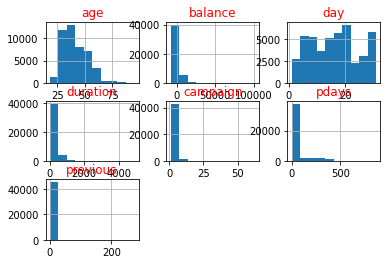

In [156]:
full_bank.hist()

In [157]:
def nullVal(full_bank):
    missing_num = full_bank.isnull().sum()
    missing_percent = (100 * missing_num / len(full_bank))
    concatinated_value = pan.concat([missing_num, missing_percent], axis = 1)
    
    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(full_bank.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order  


In [158]:
missing_num = nullVal(full_bank)

Full Bank Data has a total of '17' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot:>

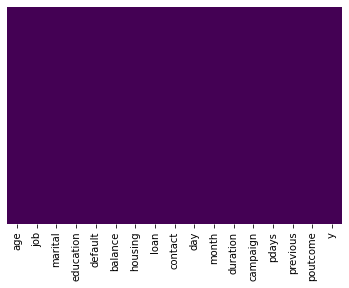

In [159]:
sea.heatmap(full_bank.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Campaign'}, xlabel='campaign'>

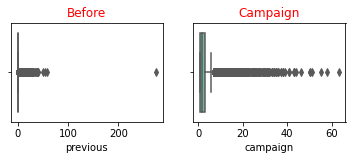

In [160]:
matplt.subplot(2, 2, 3)
matplt.title("Before")
sea.boxplot(full_bank['previous'], palette = 'Set2', color= 'Brown')

matplt.subplot(2, 2, 4)
matplt.title("Campaign")
sea.boxplot(full_bank['campaign'], palette = 'Set2', color= 'Brown')

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Before'}, xlabel='previous'>

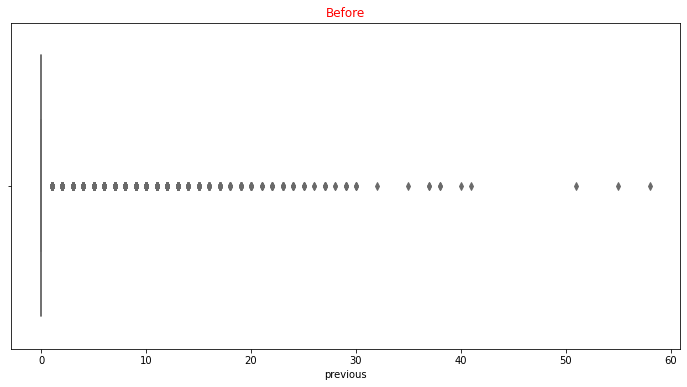

In [161]:
full_bank = (full_bank[full_bank['previous']<100])
matplt.figure(figsize = (12,6))
matplt.title('Before')
sea.boxplot(full_bank['previous'],palette = 'Set3', color = 'orange')

### DUPLICATE

In [162]:
full_bank[full_bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [163]:
full_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### DURATION

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration'}, xlabel='duration'>

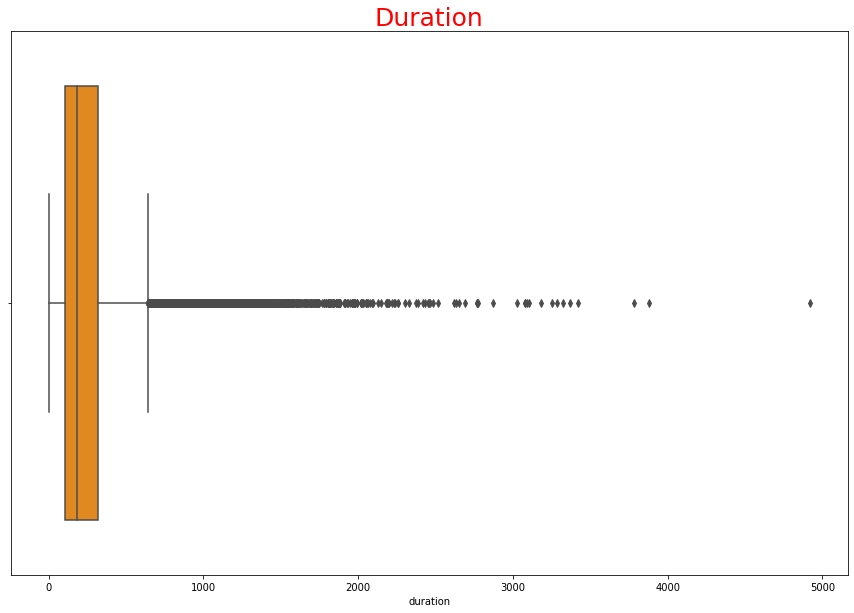

In [164]:
matplt.figure(figsize=(15,10))
matplt.title('Duration', color='red', fontsize = 25)
sea.boxplot(full_bank['duration'], color = 'darkorange')

In [165]:
full_bank.drop(full_bank[full_bank['duration'] >1000 ].index, inplace = True)

In [166]:
duration_outliers = []
def find_outliers(data):
    data = sorted(data)
    x = npy.percentile(data, 20)
    y = npy.percentile(data, 80)
    
    IQR = y- x
    lower_bound = x - (1.5*IQR)
    upper_bound = y + (1.5*IQR)
    
    for i in data:
        if(i<lower_bound or i> upper_bound):
            duration_outliers.append(i)
    return duration_outliers
    
outliers = find_outliers(full_bank['duration'])

print("Outliers using IQR method: ", min(outliers))
print("Total length of outliers using IQR method: ", len(outliers))

Outliers using IQR method:  739
Total length of outliers using IQR method:  1291


(-10.0, 1000.0)

<Figure size 1080x576 with 0 Axes>

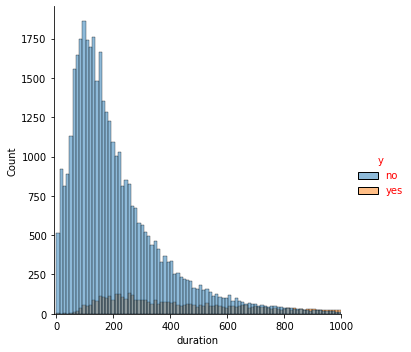

In [167]:
matplt.figure(figsize = (15,8))
sea.displot(x = full_bank['duration'], hue = full_bank['y'])
matplt.xlim(-10,1000)

In [168]:
print('Average duration for Opting the policy for "YES" ', full_bank[full_bank['y'] == 'yes']['duration'].median())
print('Average duration for not Opting the policy for "NO" ', full_bank[full_bank['y'] == 'no']['duration'].median())
 
median_y = full_bank[full_bank['y'] == 'yes']['duration'].median()
median_n = full_bank[full_bank['y'] == 'no']['duration'].median()

Average duration for Opting the policy for "YES"  374.0
Average duration for not Opting the policy for "NO"  162.0


In [169]:
full_bank['duration'] = npy.where(((full_bank['duration'] > 1000) & (full_bank['y'] == 'yes')), median_y, full_bank['duration'])
full_bank['duration'] = npy.where(((full_bank['duration'] > 1000) & (full_bank['y'] == 'no')), median_y, full_bank['duration'])

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

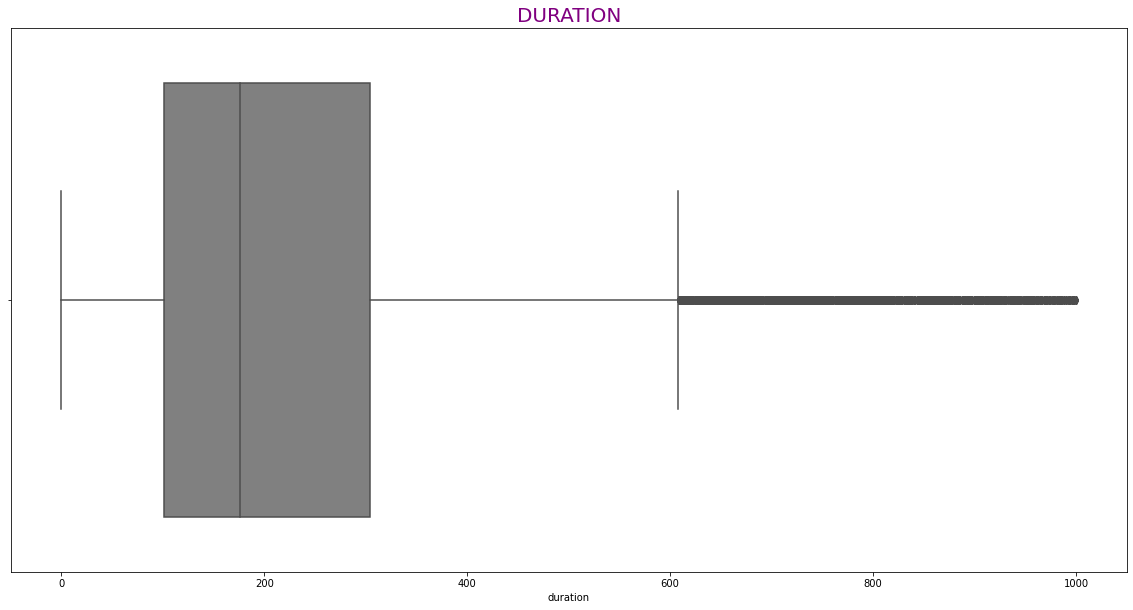

In [170]:
matplt.figure(figsize = (20,10))
matplt.title('DURATION',fontsize = 20,color = 'purple')
sea.boxplot(full_bank['duration'],color = 'gray')

### AGE

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age'}, xlabel='age'>

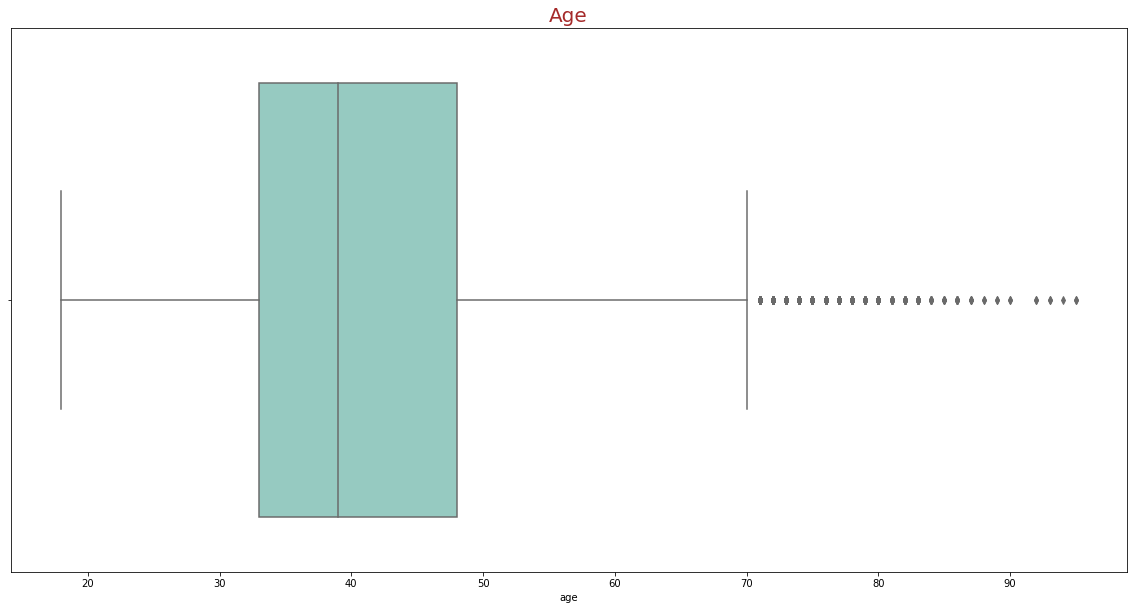

In [171]:
matplt.figure(figsize =(20 , 10) )
matplt.title('Age', color = 'Brown', fontsize = 20 )
sea.boxplot(full_bank['age'], palette = 'Set3', color = 'pink')

In [172]:
duration_outliers = []
def find_outliers(data):
    data = sorted(data)
    x = npy.percentile(data, 30)
    y = npy.percentile(data, 70)
    
    IQR = y- x
    lower_bound = x - (1.5*IQR)
    upper_bound = y + (1.5*IQR)
    
    for i in data:
        if(i<lower_bound or i> upper_bound):
            duration_outliers.append(i)
    return duration_outliers
    
outliers = find_outliers(full_bank['age'])

print("Outliers using IQR method: ", set(outliers))
print("Total length of outliers using IQR method: ", len(outliers))

Outliers using IQR method:  {65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95}
Total length of outliers using IQR method:  788


In [173]:
full_bank.query('age > 65 & y == "yes" ').count().head(1)


age    309
dtype: int64

In [174]:
full_bank.query('age > 65 & y=="no"').count().head(1)

age    421
dtype: int64

In [175]:
full_bank['campaign'] = npy.log(full_bank['campaign'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fadd9fba940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fadd9e66760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fadd9fba2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fadd9e600a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fadd9e60b80>],
 'means': []}

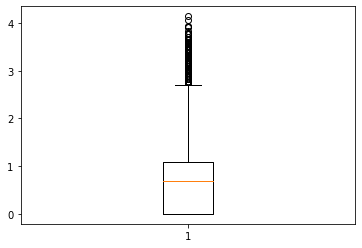

In [176]:
matplt.boxplot(full_bank['campaign'])

   ### File Output

In [177]:
#full_bank.to_csv('Outliers_full_bank.csv')

# EDA

In [178]:
full_bank = pan.read_csv('bank-full.csv', sep = ';')
full_bank['default'] = full_bank['default'].astype(object)
full_bank['housing'] = full_bank['housing'].astype(object)
full_bank['loan'] = full_bank['loan'].astype(object)
full_bank['housing'] = full_bank['housing'].astype(object)

In [179]:
full_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Text(0.5, 1.0, 'Age Vs Subscription')

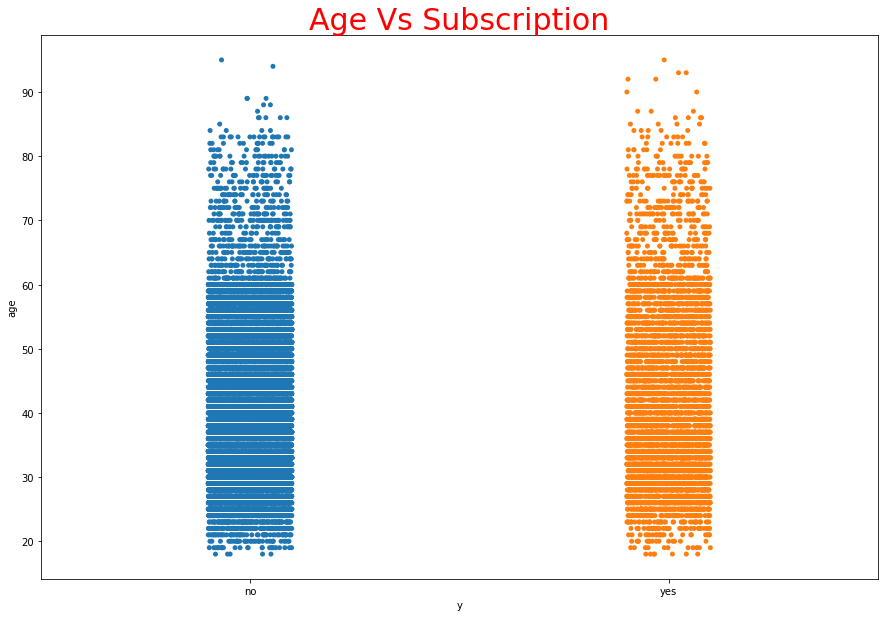

In [180]:
figure = matplt.figure(figsize=(15,10))
matplt.rcParams.update({'text.color':"red"})
sea.stripplot(x = 'y', y= 'age', data= full_bank)
matplt.title("Age Vs Subscription", fontsize=30)

### More clinets are between the age of 20-50

Text(0.5, 1.0, 'Job vs Age')

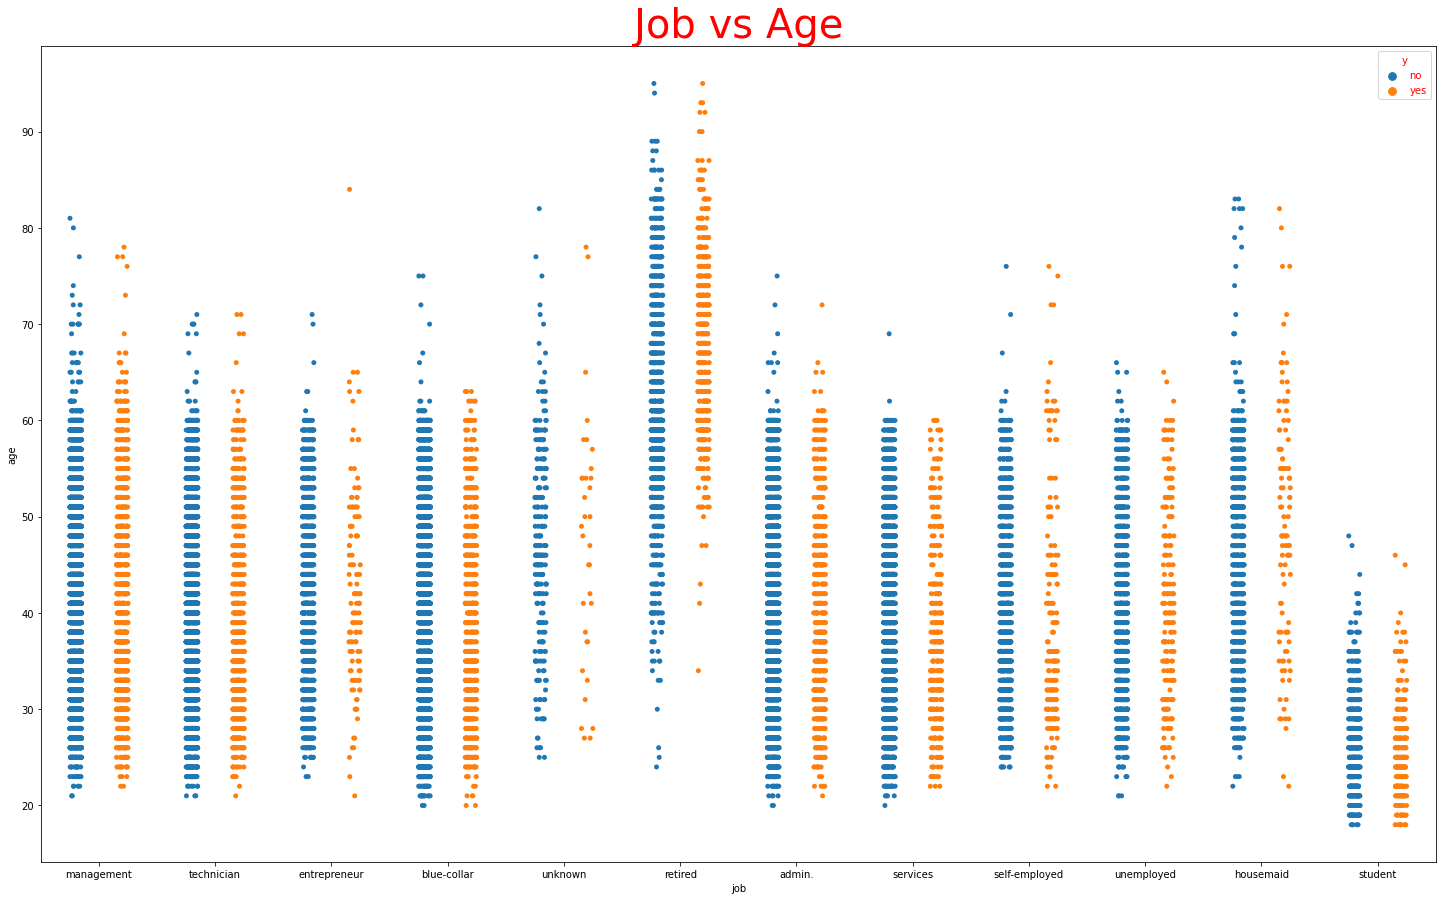

In [181]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='job', y= 'age',hue='y',data= full_bank, dodge= True)
matplt.rcParams.update({'text.color':"red"})
matplt.title("Job vs Age", fontsize = 40)

### Retired clients are more likely to buy policy than others

In [182]:
jobVSage = full_bank.groupby(['job','y'])['age'].count().unstack()

In [183]:
jobVSage

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


Text(0.5, 1.0, 'Profession Vs Subscription')

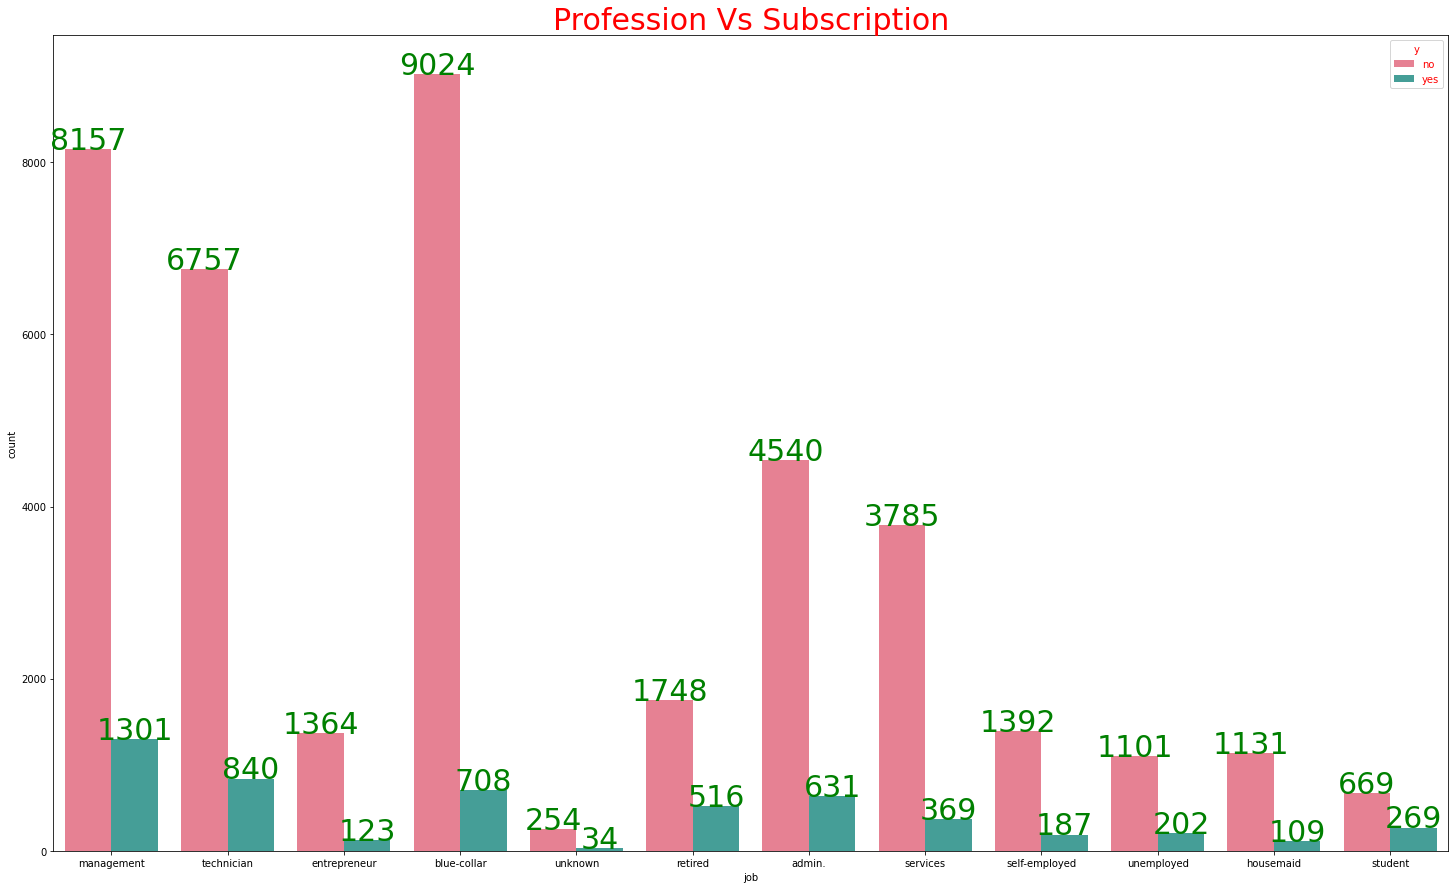

In [184]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'job', hue='y', data= full_bank, palette = "husl")
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'green',size=30)
block.set_title("Profession Vs Subscription", fontsize = 30, color= 'red')

### Those who are in management section are more likely to get the policy

In [185]:
s = full_bank.job
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pan.DataFrame({'percent': percent, 'percentage': percent100})

,percent,percentage
blue-collar,0.215257,21.5%
management,0.209197,20.9%
technician,0.168034,16.8%
admin.,0.114375,11.4%
services,0.091880,9.2%
retired,0.050076,5.0%
self-employed,0.034925,3.5%
entrepreneur,0.032890,3.3%
unemployed,0.028820,2.9%
housemaid,0.027427,2.7%


# Matrial status vs Age

Text(0.5, 1.0, 'Marital Status vs Age')

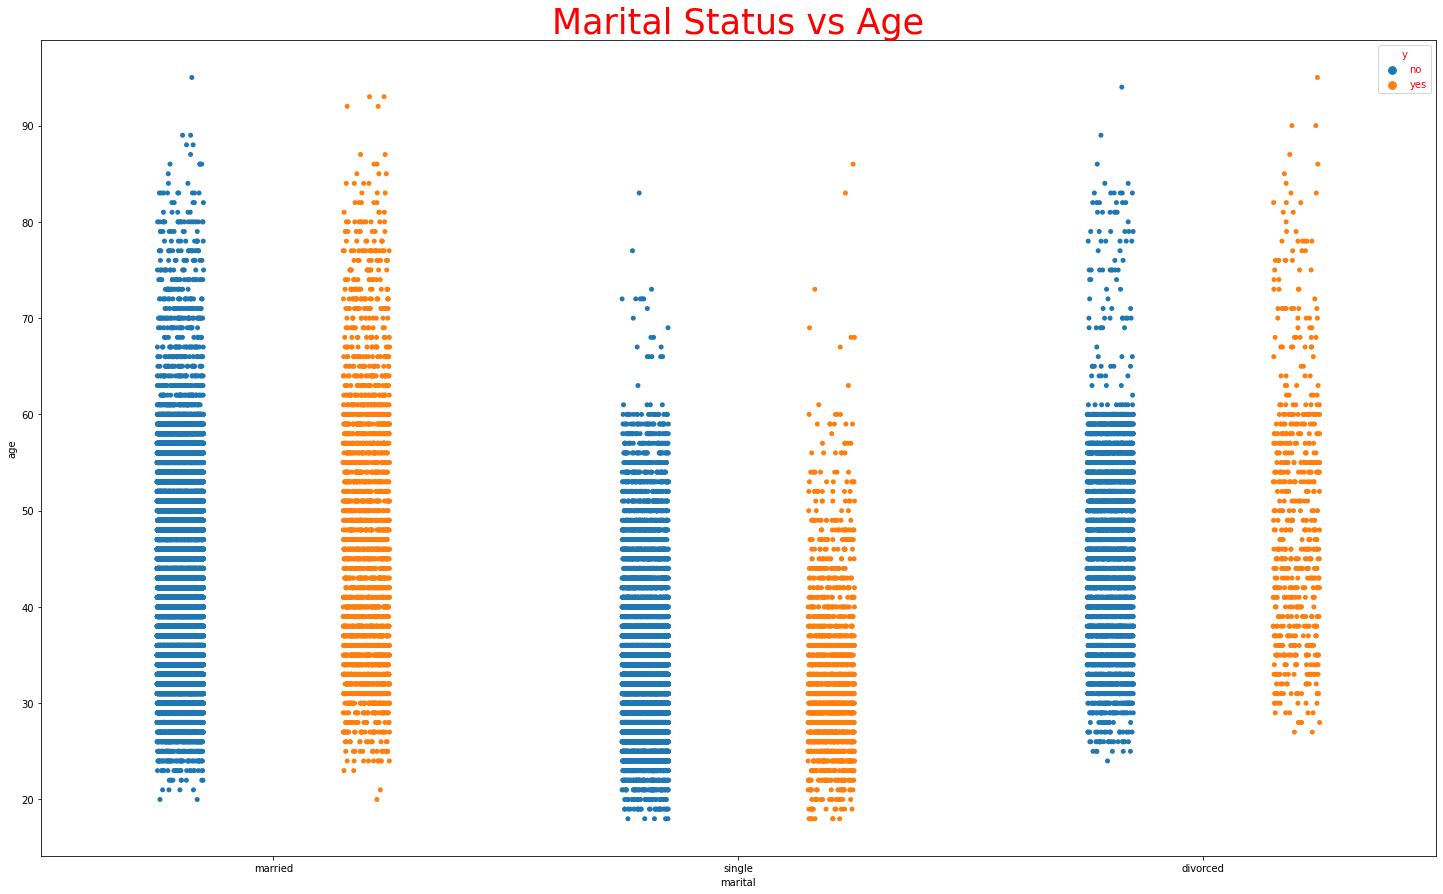

In [186]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='marital', y= 'age', hue ='y',data= full_bank, dodge= True)
matplt.rcParams.update({'text.color':"red"})
matplt.title("Marital Status vs Age", fontsize = 35)

### Those Married are more likely to buy between the age of 60 - 80

Text(0.5, 1.0, 'Marital Status Vs Subscription')

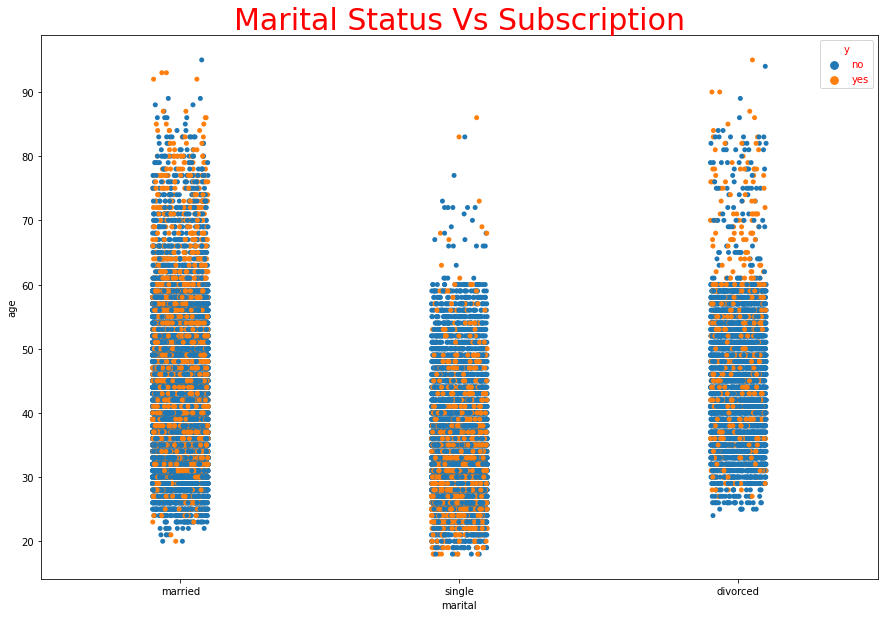

In [187]:
figure = matplt.figure(figsize=(15,10))
matplt.rcParams.update({'text.color':"red"})
sea.stripplot(x = 'marital', y= 'age',hue = 'y', data= full_bank)
matplt.title("Marital Status Vs Subscription", fontsize=30)

# Default Vs Age

Text(0.5, 1.0, 'Default vs Age')

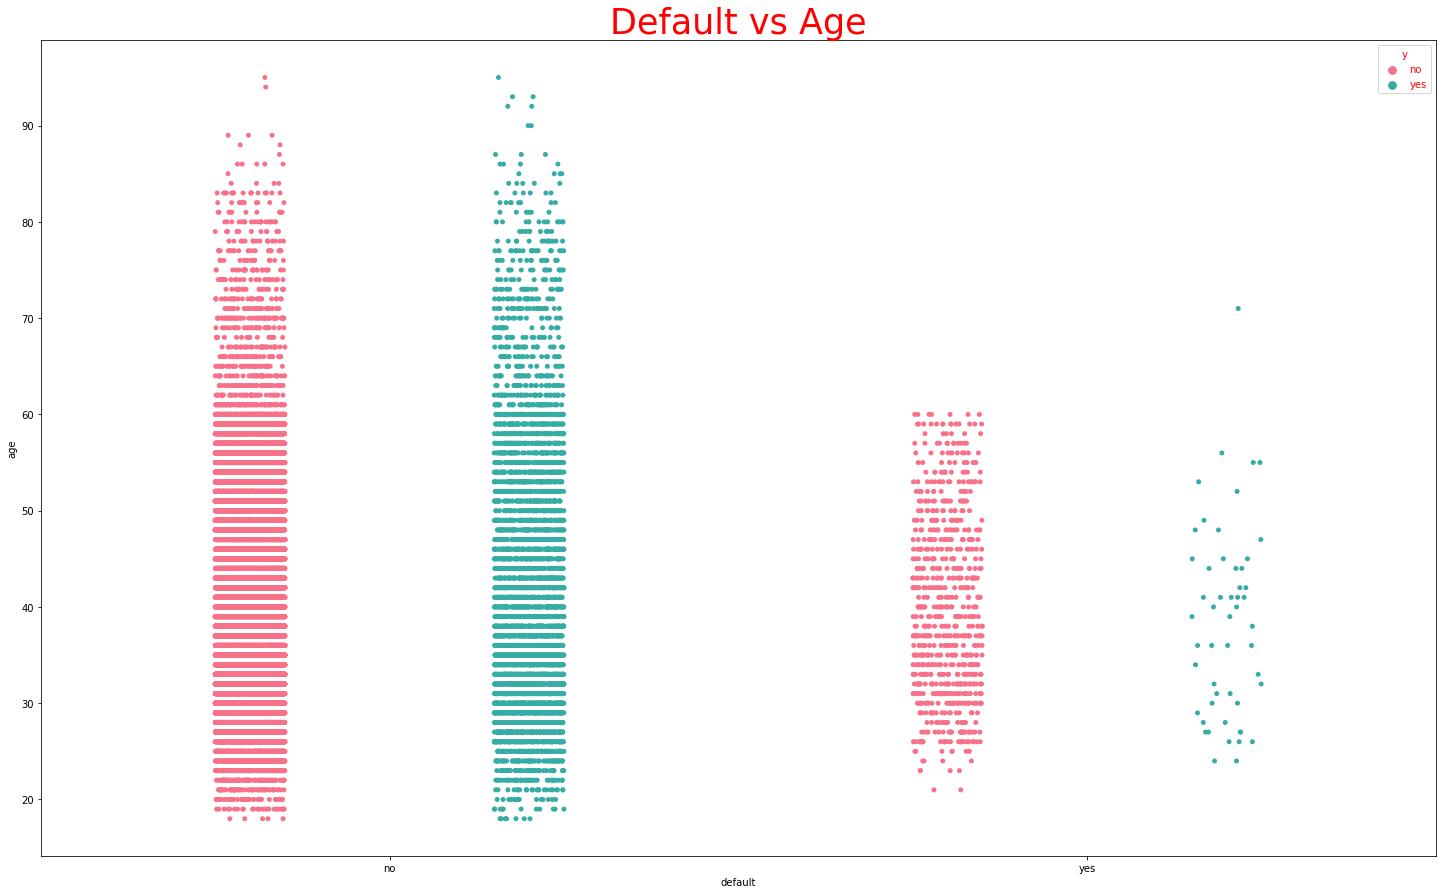

In [188]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='default', y= 'age', hue ='y',data= full_bank, dodge= True, palette = "husl")
matplt.rcParams.update({'text.color':"red"})
matplt.title("Default vs Age", fontsize = 35)

# Default Vs Subscription

Text(0.5, 1.0, 'Default Vs Subscription')

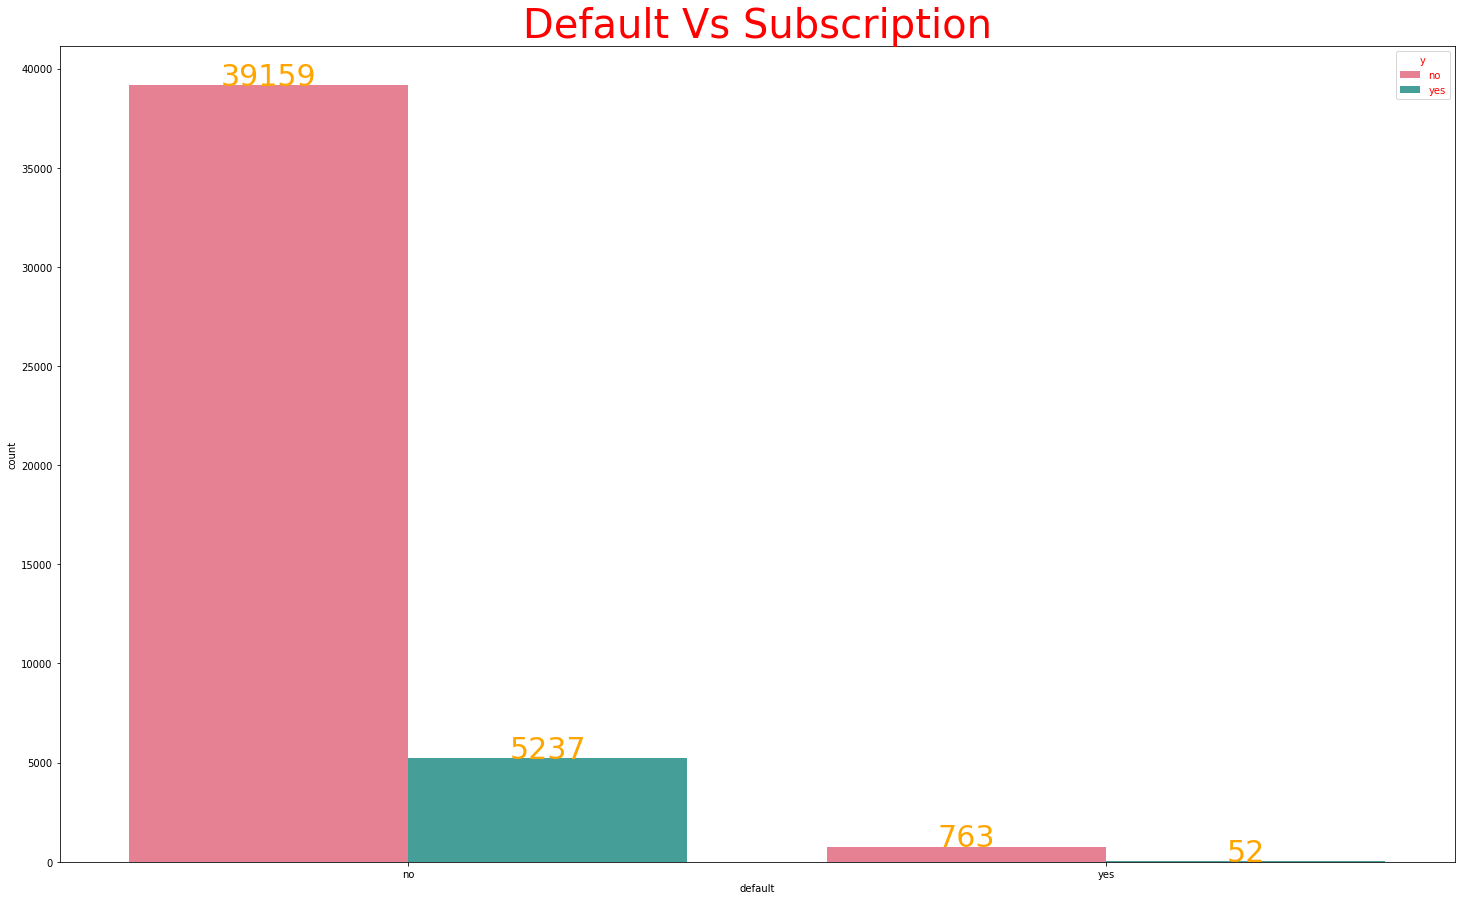

In [189]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'default', hue='y', data= full_bank, palette= ("husl"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Default Vs Subscription", fontsize = 40, color= 'red')

### Those without “no” as their option in default column are more likely to buy the policy.

Text(0.5, 1.0, 'House Vs Subscription')

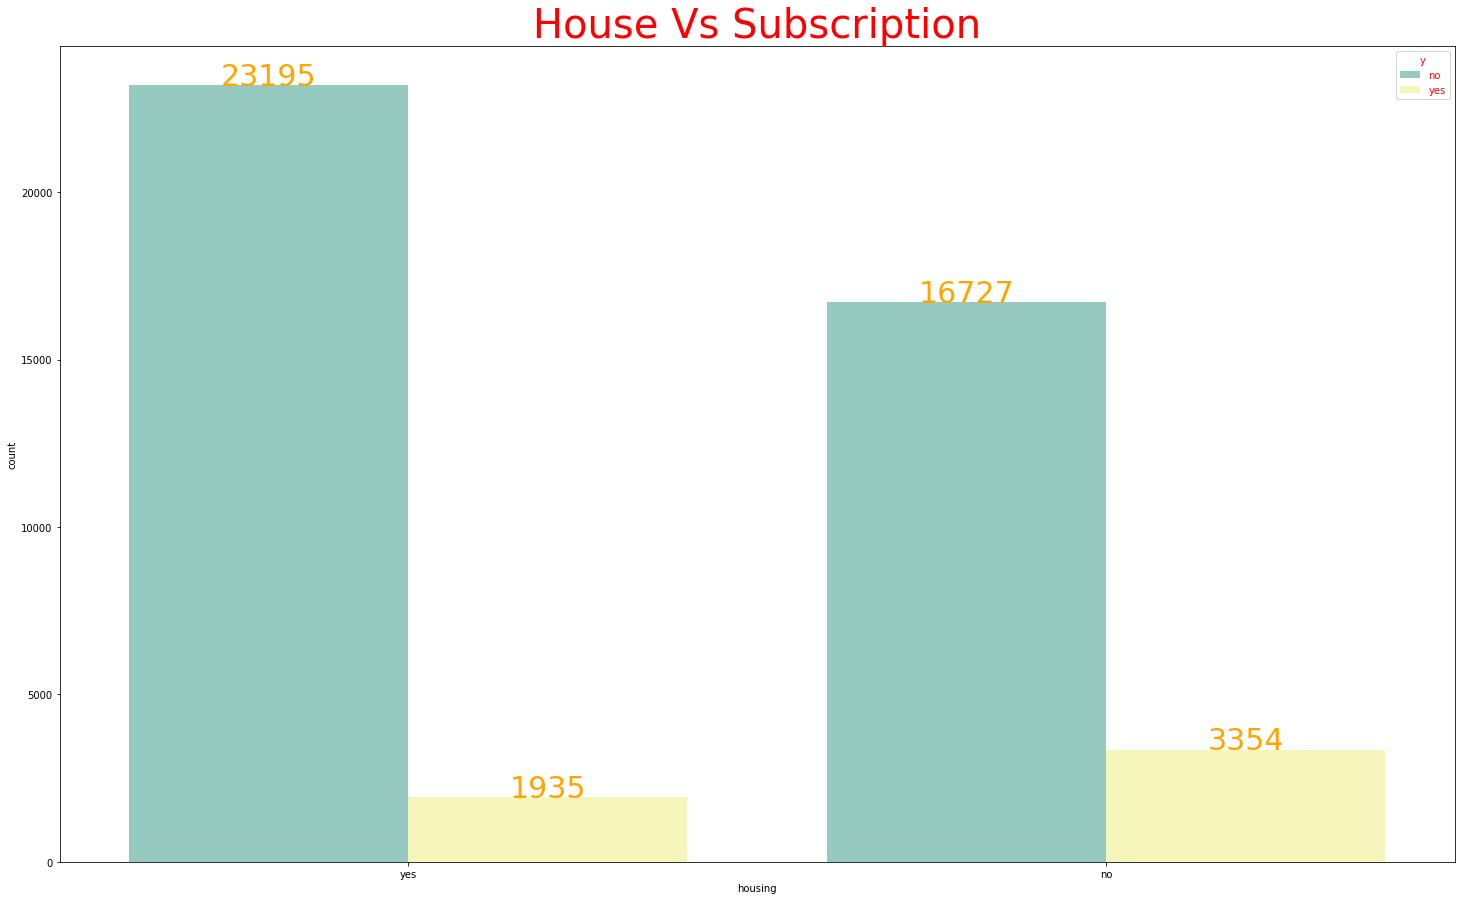

In [190]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'housing', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("House Vs Subscription", fontsize = 40, color= 'red')

Text(0.5, 1.0, 'Contact Vs Subscription')

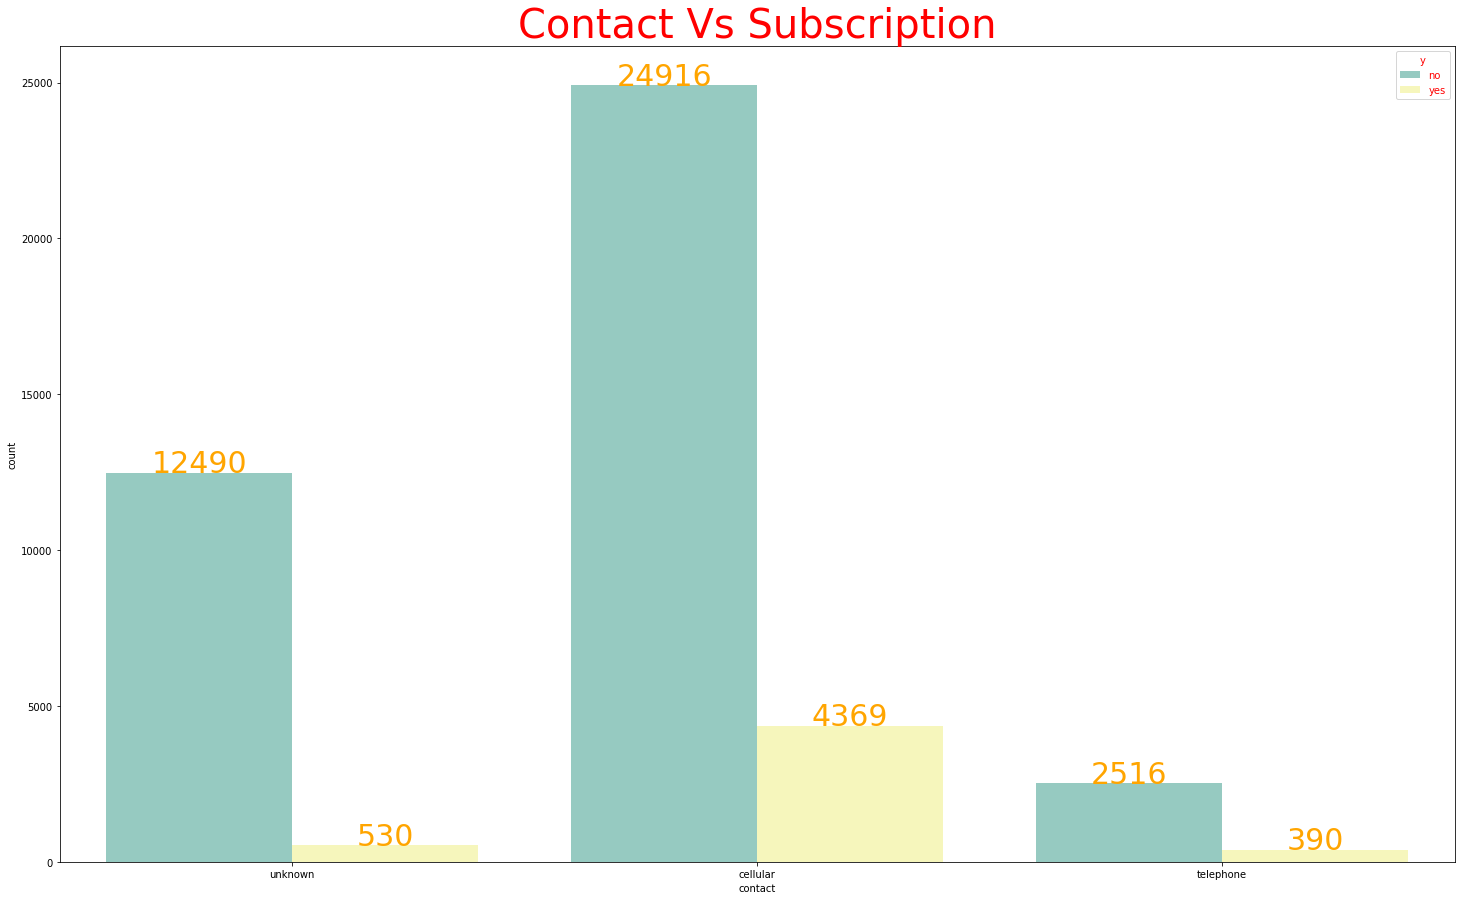

In [191]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'contact', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Contact Vs Subscription", fontsize = 40, color= 'red')

### Those with Cell Phone have more subscription than others

In [192]:
mean_y = full_bank[full_bank['y'] == 'yes']['duration'].median()
mean_n = full_bank[full_bank['y'] == 'no']['duration'].median()

print(' Mean Duration of clients having policy:', mean_y, '\n', 'Mean Duration of clients do not have policy:', mean_n)

 Mean Duration of clients having policy: 426.0 
 Mean Duration of clients do not have policy: 164.0


Text(0.5, 1.0, 'Education Vs Subscription')

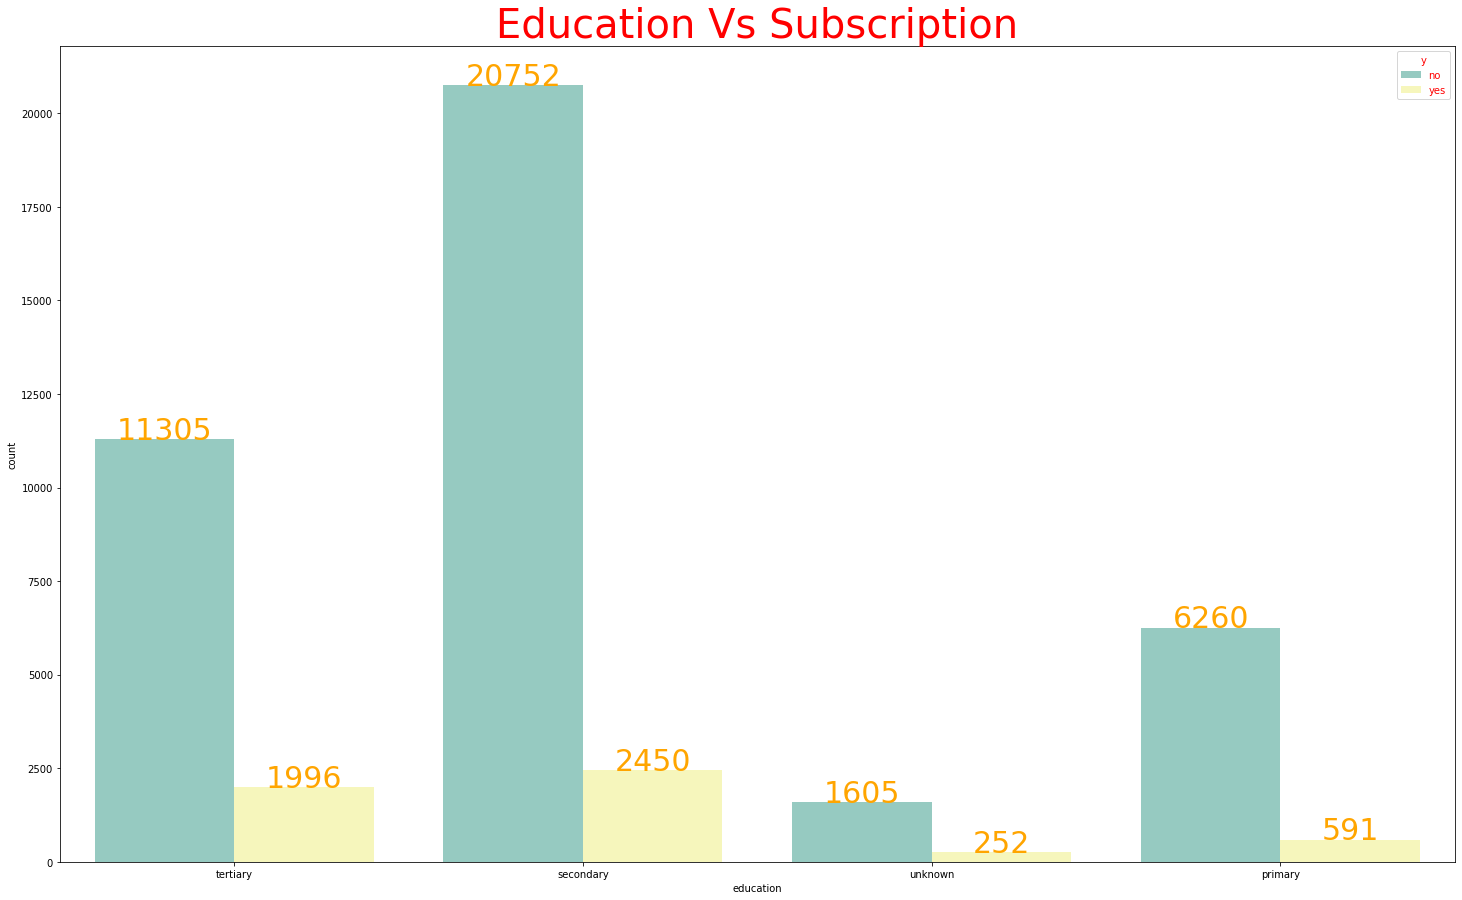

In [193]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'education', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Education Vs Subscription", fontsize = 40, color= 'red')

### Those in the Secondary are more than others in term of subscription

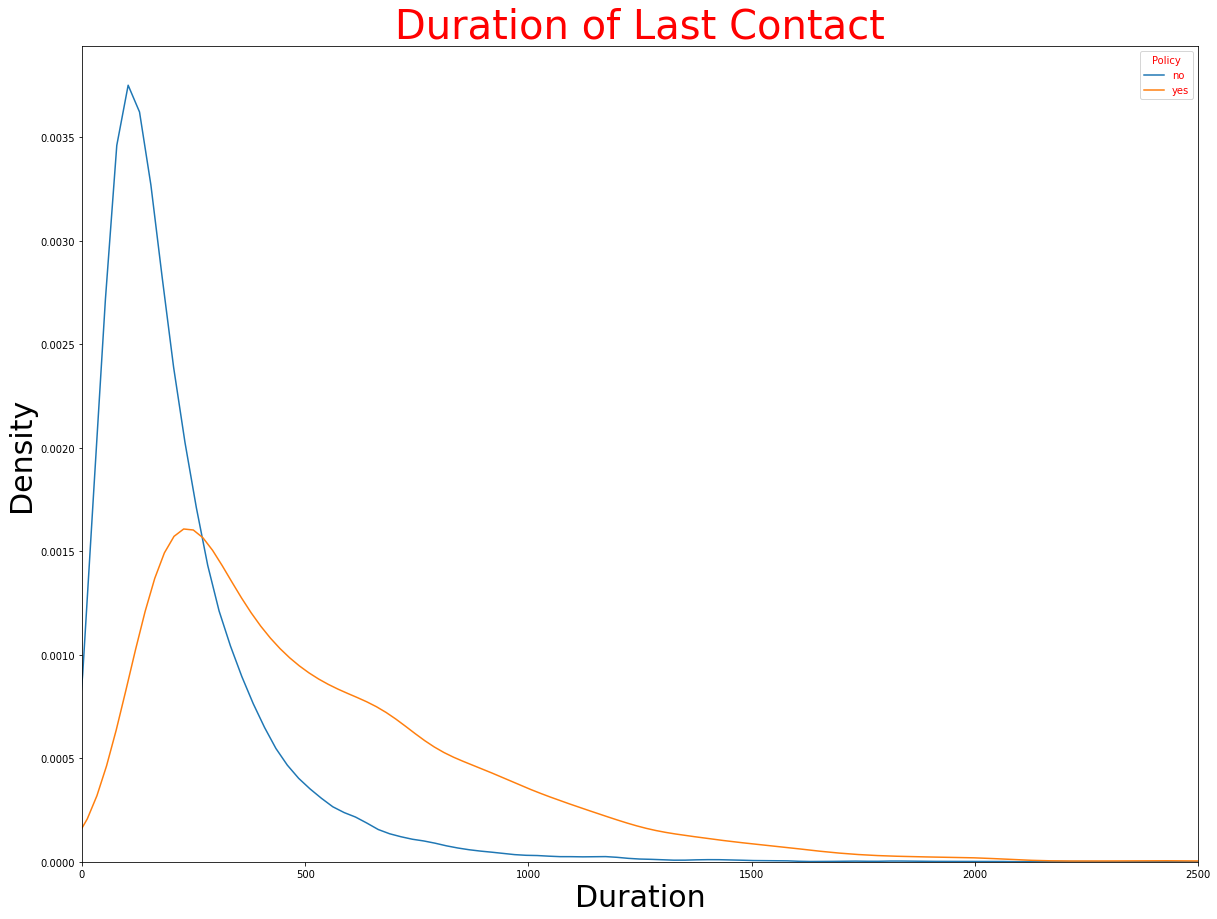

In [194]:
figure = matplt.figure(figsize=(20,15))
sea.kdeplot(full_bank.loc[full_bank['y'] == 'no', 'duration'], label = 'no',palette= 'Set3')
sea.kdeplot(full_bank.loc[full_bank['y'] == 'yes', 'duration'], label = 'yes',palette= 'Set3')
matplt.rcParams.update({'text.color':"red"})
matplt.xlabel('Duration',fontsize= 30)
matplt.ylabel('Density', fontsize=30)
matplt.title('Duration of Last Contact', fontsize = 40)
matplt.xlim(0,2500)
matplt.legend(title = 'Policy')

Text(0.5, 1.0, '# Contacts performed during Campaign and Subscription')

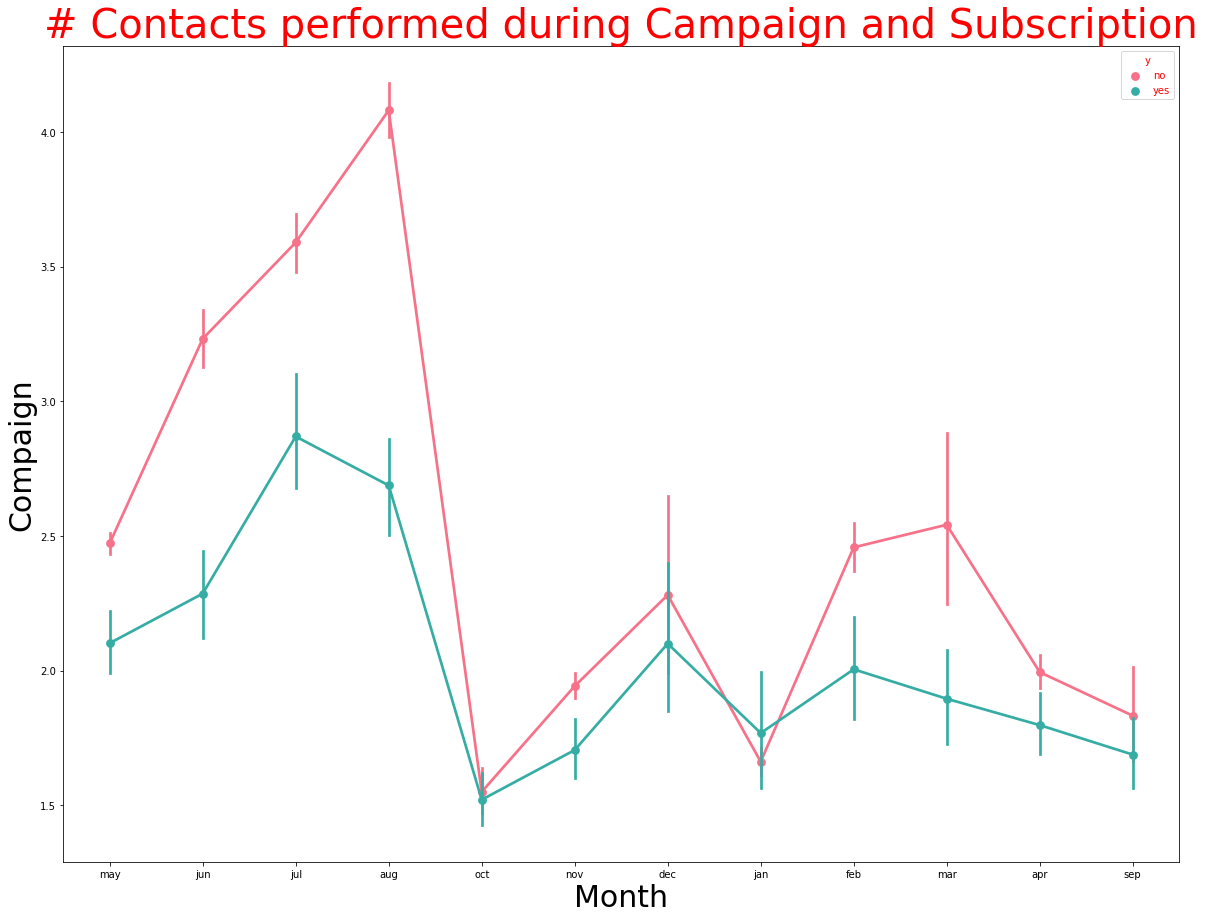

In [195]:

matplt.figure(figsize = (20,15))
sea.pointplot(data = full_bank, x = 'month',y = 'campaign',hue = 'y',palette = 'husl')
matplt.rcParams.update({'text.color':"red"})
matplt.xlabel('Month',fontsize= 30)
matplt.ylabel('Compaign', fontsize=30)
matplt.title('# Contacts performed during Campaign and Subscription',fontsize = 40)

Text(0.5, 1.0, '# Contacts performed before Campaign and Subscription')

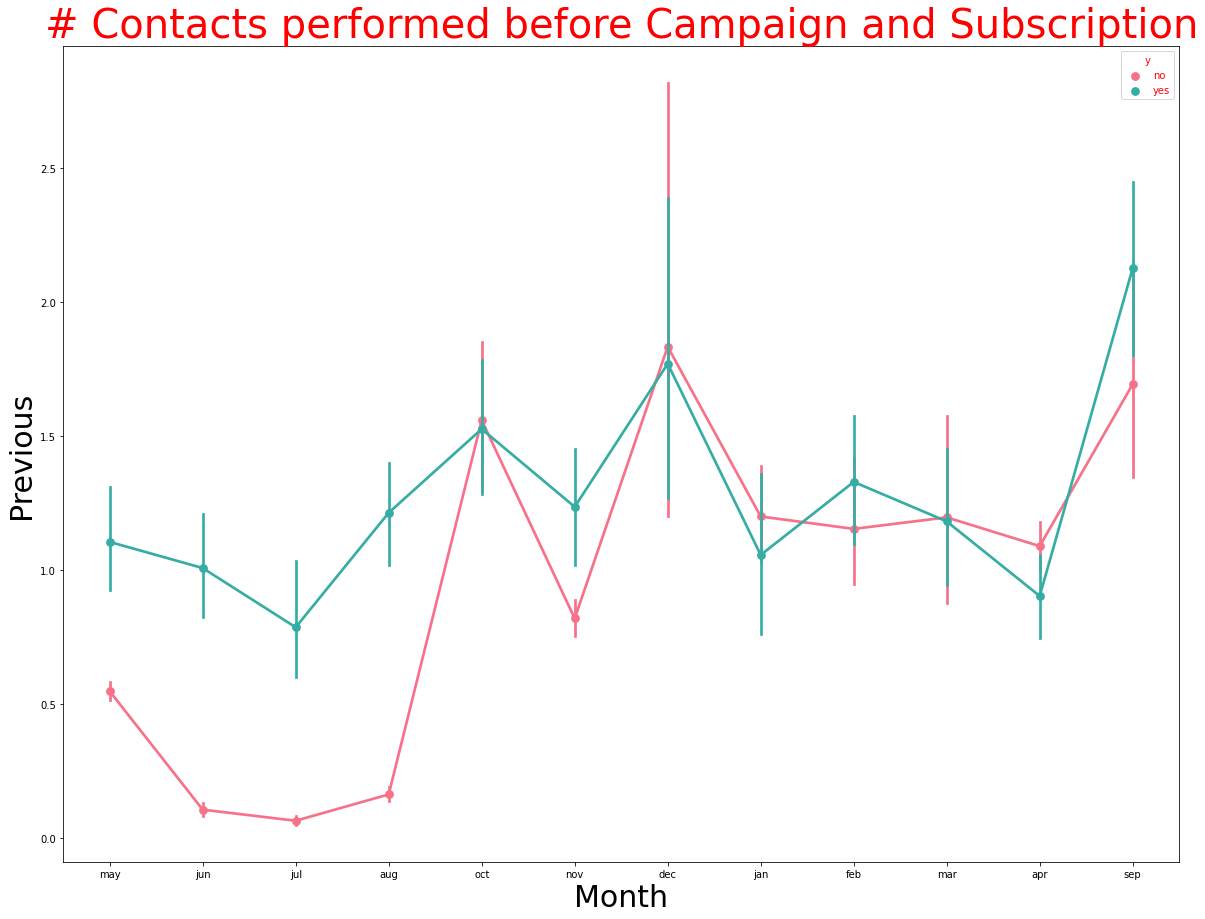

In [196]:
matplt.figure(figsize=(20,15))
sea.pointplot(data= full_bank, x = 'month', y='previous', hue = 'y', palette ="husl")
matplt.rcParams.update({'text.color':"red"})
matplt.xlabel('Month',fontsize= 30)
matplt.ylabel('Previous', fontsize=30)
matplt.title("# Contacts performed before Campaign and Subscription", fontsize= 40)

# Modeling

### Data preprocessing


In [197]:
 c = 0;

for col in full_bank:
    if full_bank[col].dtype == 'object':
        if len(list(full_bank[col].unique())) <= 2:
            l = preprocessing.LabelEncoder()
            full_bank[col] = l.fit_transform(full_bank[col])
            c = c + 1;
            print(col)

default
housing
loan
y


In [198]:
full_bank = pan.get_dummies(full_bank)
full_bank.shape

(45211, 49)

In [199]:
full_bank['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [200]:
full_bank['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [201]:
full_bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Writing the method for the Classification report result, and the matrix.

In [205]:


def print_score(classification, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train,classification.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, classification.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, classification.predict(X_train))))

        res = cross_val_score(classification, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(npy.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(npy.std(res)))

    elif train==False:
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test,classification.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, classification.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,classification.predict(X_test))))

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_bank.drop('y',axis=1),full_bank['y'],test_size=0.15,random_state=101)

In [208]:
import  gc
#garbage collector
gc.collect()

13591

In [209]:
standarScaler = StandardScaler()
X_train = standarScaler.fit_transform(X_train)
X_test = standarScaler.transform(X_test)

In [210]:
smote = SMOTE(random_state=15, sampling_strategy= 1.0)
x_train_right , y_train_right = smote.fit_resample(X_train,y_train)

/home/coder_me_ilyas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

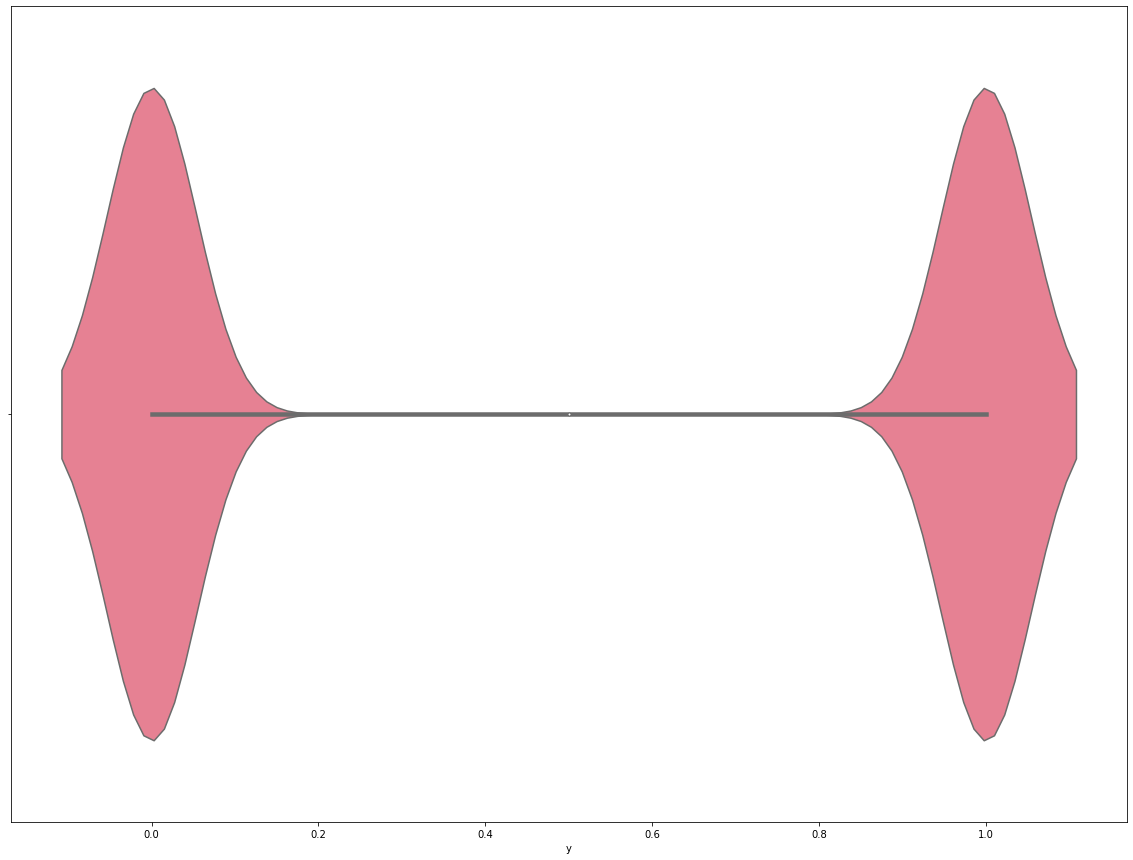

In [211]:
matplt.figure(figsize =(20,15))
sea.violinplot(y_train_right, palette = 'husl')

### let's try different modeling to get another result or best prediction result.

In [212]:
logistic_reg = LogisticRegression( C = 0.0001, random_state=21)
logistic_reg.fit(x_train_right,y_train_right)

LogisticRegression(C=0.0001, random_state=21)

In [213]:
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8367

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     33954
           1       0.85      0.81      0.83     33954

    accuracy                           0.84     67908
   macro avg       0.84      0.84      0.84     67908
weighted avg       0.84      0.84      0.84     67908


Confusion Matrix: 
 [[29168  4786]
 [ 6302 27652]]

Average Accuracy: 	 0.8357
Accuracy SD: 		 0.0037


In [214]:
#Now let's set train = False, to see the result
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8508

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      5968
           1       0.43      0.79      0.56       814

    accuracy                           0.85      6782
   macro avg       0.70      0.82      0.73      6782
weighted avg       0.90      0.85      0.87      6782


Confusion Matrix: 
 [[5128  840]
 [ 172  642]]



In [216]:
from sklearn.ensemble import RandomForestClassifier

# Now we use RandomForestClassifier method to see the recall and precission difference

classification_report_random_forest = RandomForestClassifier(n_estimators=40,random_state=21)
classification_report_random_forest.fit(x_train_right,y_train_right)


RandomForestClassifier(n_estimators=40, random_state=21)

In [217]:
print_score(classification_report_random_forest,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.8972

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5968
           1       0.58      0.54      0.56       814

    accuracy                           0.90      6782
   macro avg       0.76      0.74      0.75      6782
weighted avg       0.89      0.90      0.90      6782


Confusion Matrix: 
 [[5644  324]
 [ 373  441]]



### Now we will use LightGBM as it was mentioned in the Recommendation part with Kfold cross Validation

In [223]:
def kfold_lightGBM(train_df, num_folds, stratified = False):
    print("Starting LightGBM \n Train shape: {}".format(train_df.shape))

    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = npy.zeros(train_df.shape[0])

    feature_importance_df = pan.DataFrame()
    feats = [f for f in train_df.columns if f not in ['y']]

    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['y'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['y'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['y'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,n_estimators=10000,learning_rate=0.02,num_leaves=32,colsample_bytree=0.9497036,subsample=0.8715623,max_depth=8,reg_alpha=0.04,reg_lambda=0.073,min_split_gain=0.0222415,min_child_weight=40,silent=-1,verbose=-1,
        )
        # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
                eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print_score(clf, train_x, train_y, valid_x, valid_y, train=False)
        # Dataframe holding the different features and their importance
        fold_importance_df = pan.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pan.concat([feature_importance_df, fold_importance_df], axis=0)

        # Freeing up memory
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    display_importances(feature_importance_df)
    return feature_importance_df


Starting LightGBM 
 Train shape: (45211, 49)


/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument i

[1000]	training's auc: 0.955806	training's binary_logloss: 0.169114	valid_1's auc: 0.927529	valid_1's binary_logloss: 0.20478
Test Result:

Accuracy score: 0.9065

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     19988
           1       0.63      0.47      0.54      2618

    accuracy                           0.91     22606
   macro avg       0.78      0.72      0.74     22606
weighted avg       0.90      0.91      0.90     22606


Confusion Matrix: 
 [[19272   716]
 [ 1397  1221]]

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/coder_me_ilyas/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument i

[1000]	training's auc: 0.954669	training's binary_logloss: 0.168889	valid_1's auc: 0.93165	valid_1's binary_logloss: 0.204391
Test Result:

Accuracy score: 0.9054

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     19934
           1       0.63      0.47      0.54      2671

    accuracy                           0.91     22605
   macro avg       0.78      0.72      0.74     22605
weighted avg       0.90      0.91      0.90     22605


Confusion Matrix: 
 [[19211   723]
 [ 1415  1256]]



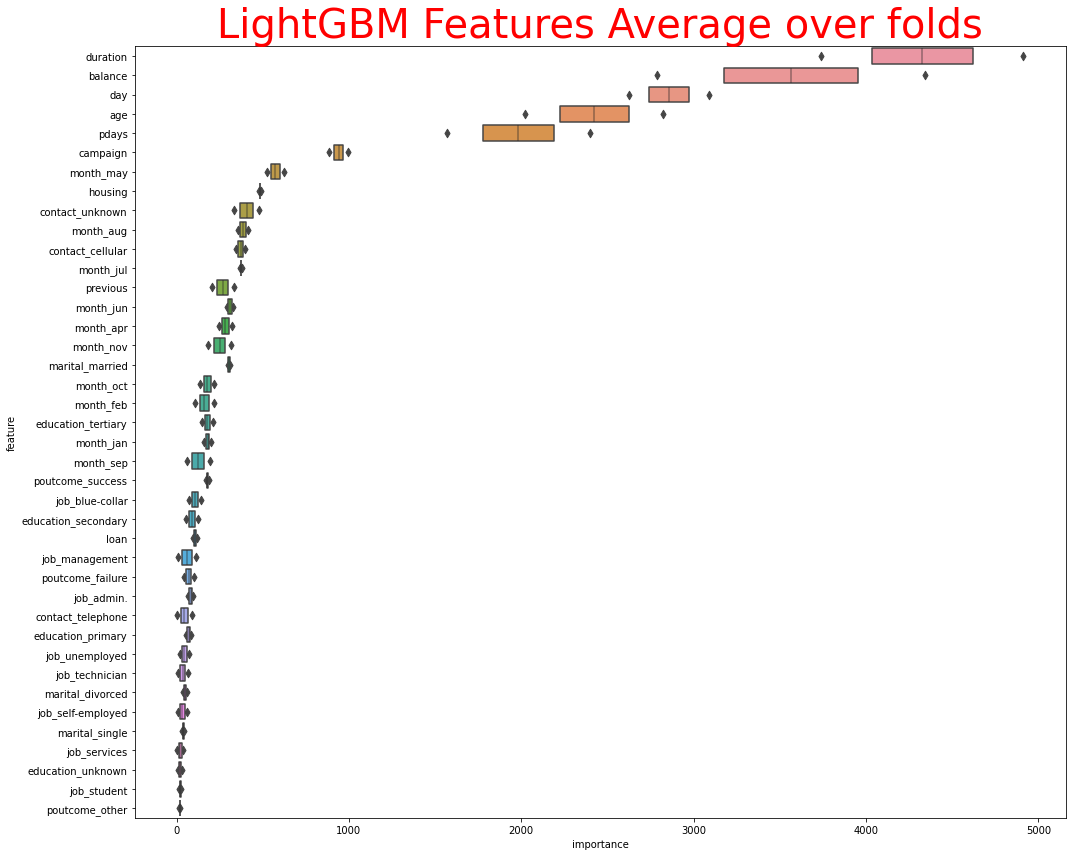

In [224]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    matplt.figure(figsize=(15, 12))
    sea.boxenplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    matplt.title('LightGBM Features Average over folds', fontsize= 40)
    matplt.tight_layout()
    matplt.savefig('lgbm_importances.png')
feat_importance = kfold_lightGBM(full_bank, num_folds= 2, stratified= False)

# THANK YOU VERY MUCH!